In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data set from https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv

In [2]:
data = pd.read_csv('/Users/GGS/Desktop/25Nov18/ML/timeseries/AirPassengers.csv')


In [3]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data_0 = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)


In [5]:
data_0.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
ts = data_0["#Passengers"]

In [7]:
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

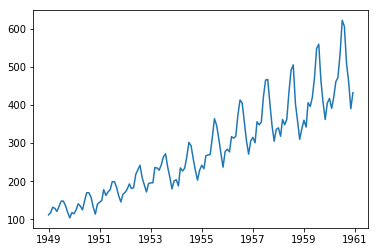

In [8]:
plt.plot(ts)

In [9]:
(ts.isnull().sum())

0

In [10]:
from utils import  ad_fuller_test, plot_rolling_stats,plot_acf_pacf

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


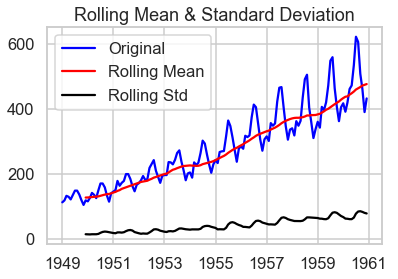

In [11]:
ad_fuller_test(ts)
plot_rolling_stats(ts)

In [12]:
ts_log = np.log(ts)

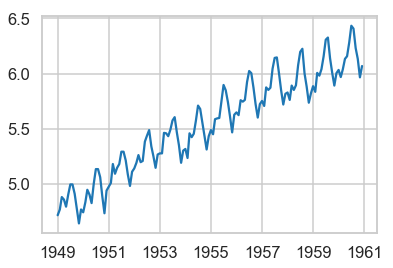

In [13]:
plt.plot(ts_log)

Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


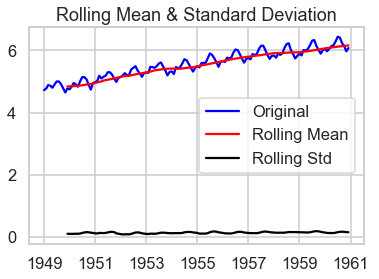

In [14]:
ad_fuller_test(ts_log)
plot_rolling_stats(ts_log)

# Moving Average

In [15]:
moving_avg = pd.rolling_mean(ts_log,12)

C:\Users\GGS\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  """Entry point for launching an IPython kernel.


In [16]:
ts_log_moving_avg_diff = ts_log - moving_avg

In [17]:
(ts_log_moving_avg_diff.isnull().sum())

11

In [18]:
ts_log_moving_avg_diff.dropna(inplace=True)

Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (5%)             -2.886151
Critical Value (1%)             -3.486535
Critical Value (10%)            -2.579896
dtype: float64


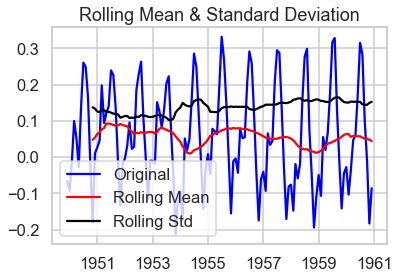

In [19]:
ad_fuller_test(ts_log_moving_avg_diff)
plot_rolling_stats(ts_log_moving_avg_diff)

# Difference

In [20]:
ts_log_diff = ts_log - ts_log.shift()

In [22]:
ts_log_diff.dropna(inplace=True)

Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (5%)             -2.884398
Critical Value (1%)             -3.482501
Critical Value (10%)            -2.578960
dtype: float64


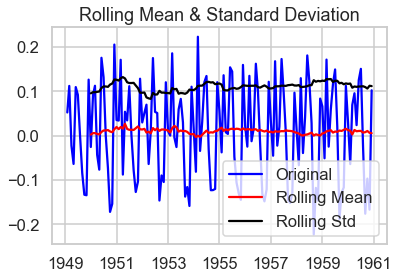

In [23]:
ad_fuller_test(ts_log_diff)
plot_rolling_stats(ts_log_diff)

# Decompose

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [25]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (5%)           -2.885538e+00
Critical Value (1%)           -3.485122e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


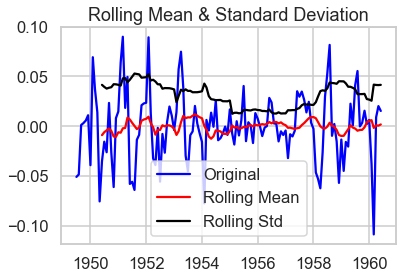

In [26]:
ad_fuller_test(ts_log_decompose)
plot_rolling_stats(ts_log_decompose)